In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Kashi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = pd.read_excel(r'C:\Users\Kashi\Downloads\EastWestAirlines.xlsx')
df1 = df.copy()
df2 = df.copy()

In [7]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [10]:
df.shape

(3999, 12)

# HC 


In [8]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']]=ms.fit_transform(df[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']])

In [9]:
df_norm = df.iloc[:,1:]

In [10]:
import scipy.cluster.hierarchy as sch

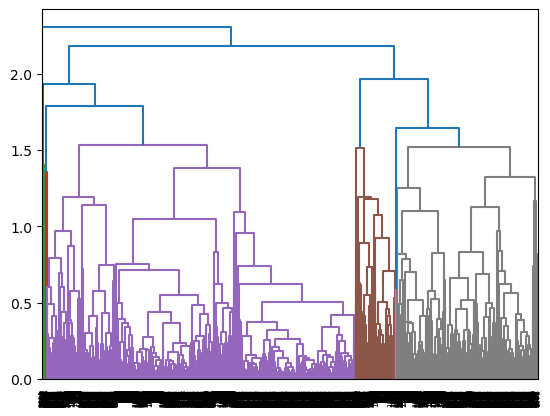

In [11]:
sch.dendrogram(sch.linkage(df_norm, method = 'complete'))
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')


In [13]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [14]:
yhc = hc.fit_predict(df_norm)
yhc 

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [15]:
df1['Clusters']= yhc
df1

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [16]:
 df1.sort_values('Clusters')


,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters
1999,2016,327126,1452,5,1,1,97997,25,350,3,4440,1,0
3162,3184,103203,0,1,1,1,3200,4,200,2,1556,1,0
3165,3187,194816,0,1,1,1,20822,25,6647,12,2424,1,0
3167,3189,17863,0,1,1,1,0,0,0,0,2028,1,0
1505,1520,391222,0,3,1,1,27471,20,1600,7,4905,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,1778,1703,0,1,1,1,1230,4,0,0,4390,0,2
1764,1780,70518,0,1,1,1,2000,3,1000,2,4450,0,2
1768,1784,99336,0,3,1,1,14195,14,500,1,4453,0,2
1770,1786,38918,0,1,1,1,6505,29,618,2,4442,0,2


In [17]:
df1[df1['Clusters'] == 3]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters


In [18]:
from sklearn.metrics import silhouette_score
silhouette_score(df1.iloc[:,1:],df1["Clusters"])

0.10760940577136698

# KMeans


In [19]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
df[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']]=sc.fit_transform(df[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award']])

In [20]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.iloc[:,1:])
  wcss.append(kmeans.inertia_)

In [21]:
wcss

[43989.00000000001,
 35409.51662986132,
 30899.253324696227,
 27153.952178046064,
 23706.69430799643,
 22303.271926123736,
 18891.512865822082,
 17316.75360435649,
 15964.894555560122,
 14732.307441577814]

<AxesSubplot:>

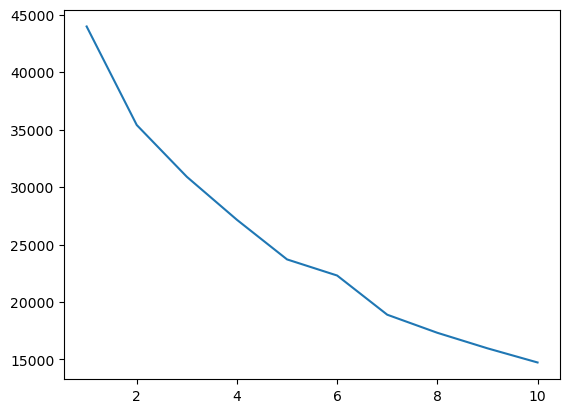

In [22]:
sns.lineplot(x=range(1,11),y=wcss)

In [23]:
kmeans = KMeans(n_clusters=2)
predict=kmeans.fit_predict(df.iloc[:,1:])

In [24]:
predict

array([0, 0, 0, ..., 0, 0, 0])

In [25]:

df2['ClusterID'] = kmeans.labels_
df2

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [26]:
silhouette_score(df2,df2["ClusterID"])

0.3430541672335126

# DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
df.iloc[:,1:11]=sc.fit_transform(df.iloc[:,1:11])

In [33]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=6)

nbrs = nn.fit(df)

distances,indices = nbrs.kneighbors(df)

In [30]:
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan.fit_predict(df)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [31]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [32]:

df3 = df.copy()
df3['cluster']=dbscan.labels_
df3

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,-1
1,2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,-1
2,3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,-1
3,4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,-1
4,5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,-1
3995,4018,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,-1
3996,4019,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,-1
3997,4020,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,-1
